In [1]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Configure the plotting
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12, 8)})

In [3]:
# Read the card details dataset
card = pd.read_csv('../data/card.csv', ';')

<AxesSubplot:xlabel='rarity', ylabel='count'>

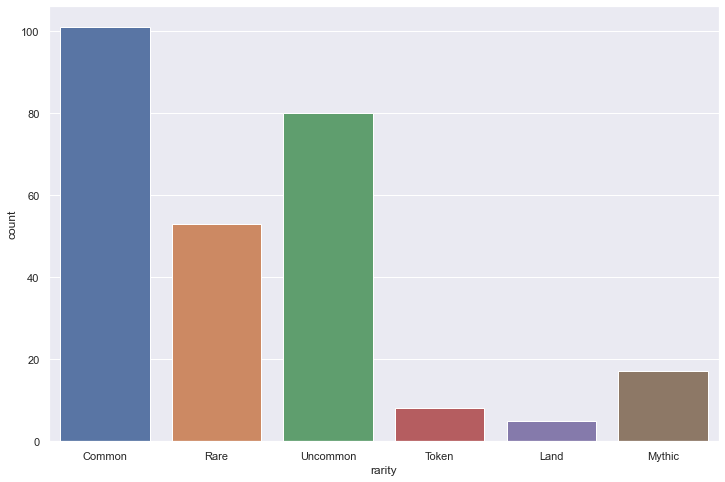

In [4]:
# Plot the distribution of Rarity trait among cards
sns.countplot(x=card['rarity'])

In [5]:
# Read the daily cards statistics
card_stats = pd.read_csv('../data/card_stats.csv', ';')
card_stats

,card_ID,price_from,30_avg_price,7_avg_price,1_avg_price,available_items,date_ID
0,1,0.15,0.69,0.75,0.91,948,1
1,2,0.02,0.19,0.24,0.23,2274,1
2,3,0.10,0.41,0.44,0.41,1351,1
3,4,1.00,2.16,2.36,3.79,319,1
4,5,8.99,11.51,12.28,13.09,166,1
...,...,...,...,...,...,...,...
2635,260,0.01,0.02,0.04,0.02,4841,10
2636,261,0.01,0.03,0.03,0.02,4817,10
2637,262,0.01,0.02,0.03,0.02,4902,10
2638,263,32.85,33.20,36.01,36.90,37,10


In [6]:
# Join cards statistics with details about each card
joined = card_stats.set_index('card_ID').join(card.set_index('card_ID')).reset_index()
joined

,card_ID,price_from,30_avg_price,7_avg_price,1_avg_price,available_items,date_ID,card_name,expansion_name,rarity
0,1,0.15,0.69,0.75,0.91,948,1,Skyshroud Claim,Battlebond,Common
1,1,0.15,0.69,0.75,0.91,948,2,Skyshroud Claim,Battlebond,Common
2,1,0.10,0.71,0.79,0.87,987,3,Skyshroud Claim,Battlebond,Common
3,1,0.15,0.71,0.76,0.63,993,4,Skyshroud Claim,Battlebond,Common
4,1,0.08,0.72,0.76,0.80,993,5,Skyshroud Claim,Battlebond,Common
...,...,...,...,...,...,...,...,...,...,...
2635,264,16.00,19.28,19.30,17.99,39,6,Rowan Kenrith (V.2),Battlebond,Mythic
2636,264,16.00,19.28,19.30,17.99,38,7,Rowan Kenrith (V.2),Battlebond,Mythic
2637,264,16.00,19.28,19.30,17.99,38,8,Rowan Kenrith (V.2),Battlebond,Mythic
2638,264,16.00,19.28,19.30,17.99,38,9,Rowan Kenrith (V.2),Battlebond,Mythic


In [7]:
# To select only the newest stats:
recent_stats = joined[joined['date_ID'] == max(joined['date_ID'])]

,card_ID,price_from,30_avg_price,7_avg_price,1_avg_price,available_items,date_ID,card_name,expansion_name,rarity,above_mean_availability
0,1,0.15,0.69,0.75,0.91,948,1,Skyshroud Claim,Battlebond,Common,False
1,1,0.15,0.69,0.75,0.91,948,2,Skyshroud Claim,Battlebond,Common,False
2,1,0.10,0.71,0.79,0.87,987,3,Skyshroud Claim,Battlebond,Common,False
3,1,0.15,0.71,0.76,0.63,993,4,Skyshroud Claim,Battlebond,Common,False
4,1,0.08,0.72,0.76,0.80,993,5,Skyshroud Claim,Battlebond,Common,False
...,...,...,...,...,...,...,...,...,...,...,...
2635,264,16.00,19.28,19.30,17.99,39,6,Rowan Kenrith (V.2),Battlebond,Mythic,False
2636,264,16.00,19.28,19.30,17.99,38,7,Rowan Kenrith (V.2),Battlebond,Mythic,False
2637,264,16.00,19.28,19.30,17.99,38,8,Rowan Kenrith (V.2),Battlebond,Mythic,False
2638,264,16.00,19.28,19.30,17.99,38,9,Rowan Kenrith (V.2),Battlebond,Mythic,False


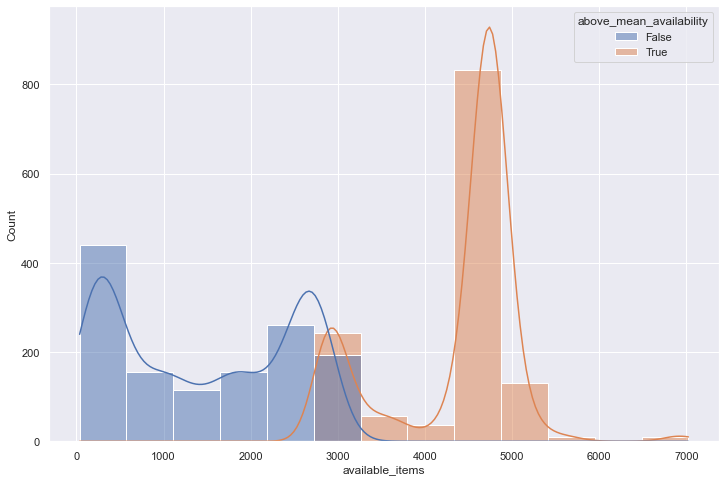

In [8]:
# Find the mean number of available items and create new boolean attribute from that
mean_items = joined.describe().loc["50%", "available_items"]
joined['above_mean_availability'] = list(map(lambda x: True if x > mean_items else False, joined['available_items']))

# Show the joined table and draw a histogram of availability for more and less available cards
sns.histplot(data=joined, x='available_items', kde=True, bins=13, hue='above_mean_availability')
joined

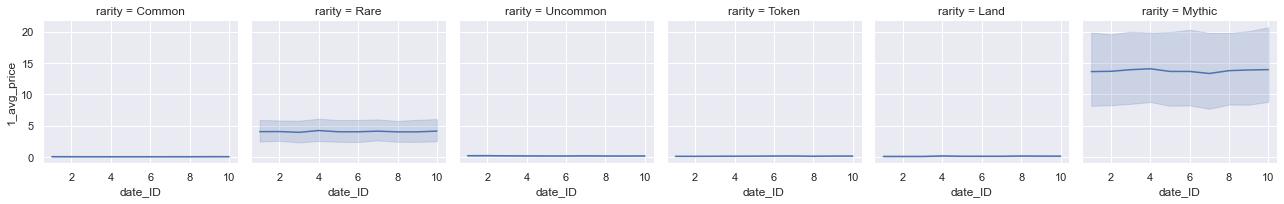

In [9]:
# Compare the price changes for different Rarity attribute values
g = sns.FacetGrid(joined, col="rarity")
g.map(sns.lineplot, "date_ID", "1_avg_price")

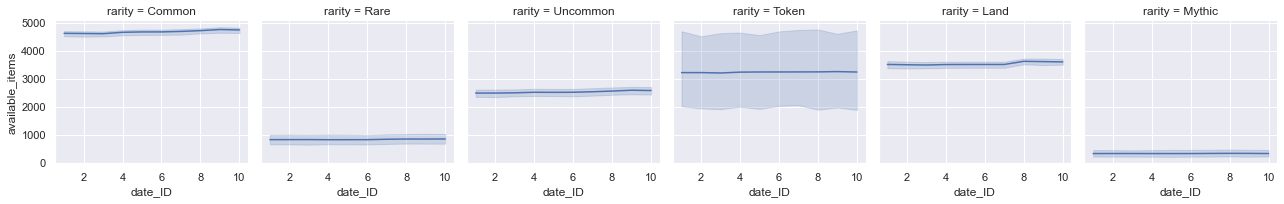

In [10]:
# Compare the availability changes for different Rarity attribute values
g = sns.FacetGrid(joined, col="rarity")
g.map(sns.lineplot, "date_ID", "available_items")

In [11]:
### Check if decrese in availability is correlated with an increase in price ###

In [12]:
# Average values of stats for each card
joined.groupby(['card_ID', 'card_name']).mean()

,,price_from,30_avg_price,7_avg_price,1_avg_price,available_items,date_ID,above_mean_availability
card_ID,card_name,,,,,,,
1,Skyshroud Claim,0.117,0.713,0.771,0.813,1002.6,5.5,0.0
2,Impulse,0.020,0.187,0.231,0.223,2254.1,5.5,0.0
3,"Zndrsplt, Eye of Wisdom",0.100,0.387,0.381,0.377,1367.7,5.5,0.0
4,Chain Lightning,1.000,2.201,2.436,2.455,319.5,5.5,0.0
5,Stolen Strategy,8.990,11.890,13.064,13.517,172.2,5.5,0.0
...,...,...,...,...,...,...,...,...
260,Rhox Brute,0.010,0.020,0.040,0.020,4773.6,5.5,1.0
261,Hexplate Golem,0.010,0.030,0.030,0.020,4753.9,5.5,1.0
262,Night Market Guard,0.010,0.020,0.030,0.020,4819.1,5.5,1.0


<AxesSubplot:xlabel='30_avg_price', ylabel='price_from'>

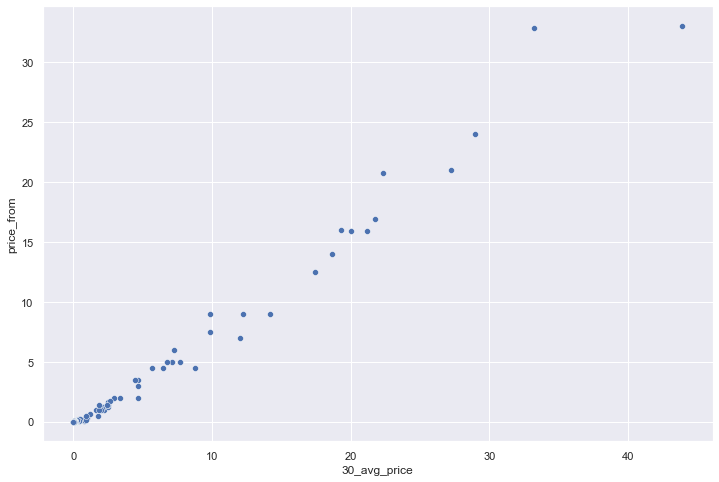

In [13]:
# Show correlation between the lowest and monthly average prices
sns.scatterplot(data=recent_stats, y='price_from', x='30_avg_price')

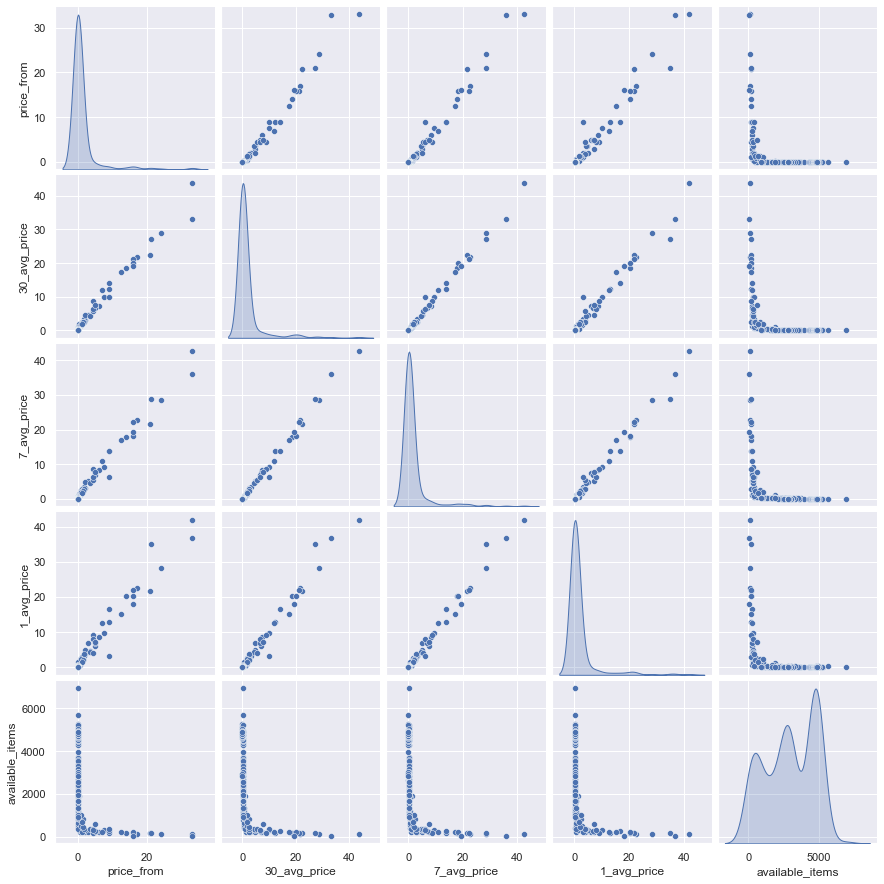

In [14]:
# Compare the attribues against each other
sns.pairplot(data=recent_stats.drop(['card_ID', 'date_ID'], axis=1), diag_kind='kde')

<AxesSubplot:ylabel='Count'>

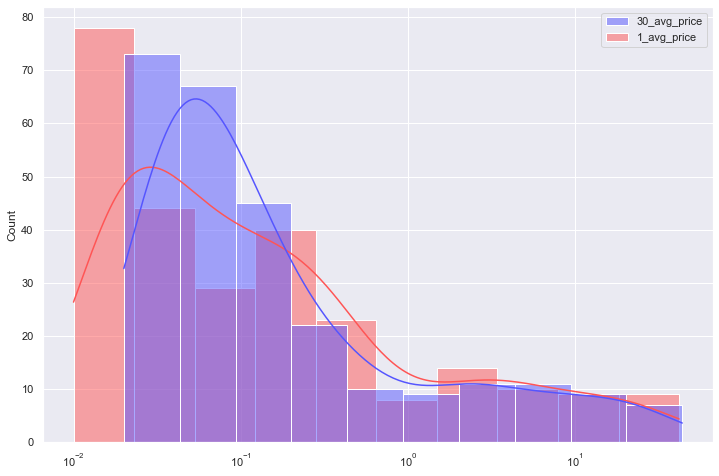

In [15]:
# Draw a histogram for the amount of cards versus variable 1-day and 30-days averages
sns.histplot(data=recent_stats[['30_avg_price', '1_avg_price']], log_scale=True, bins=10, kde=True, common_bins=False, palette='seismic')

(array([11.,  6.,  8.,  2.,  1.,  3.,  1.,  2.,  2.,  1.,  1.,  2.]),
 array([ 0.5       ,  1.29166667,  2.08333333,  2.875     ,  3.66666667,
         4.45833333,  5.25      ,  6.04166667,  6.83333333,  7.625     ,
         8.41666667,  9.20833333, 10.        ]),
 <BarContainer object of 12 artists>)

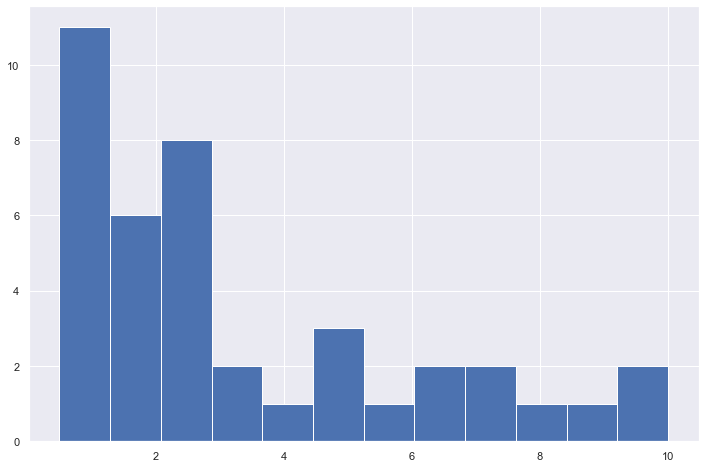

In [16]:
# Present the distribution of monthly average prices
plt.hist(data=recent_stats, x='30_avg_price', cumulative=False, range=(0.5, 10), bins=12)

In [17]:
# Load the user sellers dataset
seller = pd.read_csv('../data/seller.csv', ';')
seller

,seller_ID,seller_name,type,member_since,country,address
0,1,PartyNator,Private,2012,Spain,NaN
1,2,CValle,Private,2020,Spain,NaN
2,3,MarcoSanzin,Private,2016,Italy,NaN
3,4,MagicBivio,Private,2021,Italy,NaN
4,5,Tezzeret84,Private,2009,Spain,NaN
...,...,...,...,...,...,...
6029,6030,Tundra,Private,2013,Spain,NaN
6030,6031,Pyromanix,Private,2020,Germany,NaN
6031,6032,Edufonseca,Private,2015,Portugal,NaN
6032,6033,Phoenaeda,Private,2021,Germany,NaN


In [18]:
# Show sellers with an address
seller[seller['address'].isna() == False]

,seller_ID,seller_name,type,member_since,country,address
7,8,Topdeckskills,Professional,2012,Ireland,"13 O'Brien Park, V14 AC65 Shannon, Co. Clare, ..."
23,24,Zoocomics,Professional,2018,Norway,"Anders baars veg 25b, 3737 Skien, Norway"
24,25,MTG-Prime,Professional,2018,France,"34 rue Combanaire, 36000 Châteauroux, France"
32,33,TheCoonRises,Powerseller,2016,Germany,"Neue Straße 46, 89073 Ulm, Germany"
44,45,tennlos,Professional,2020,Poland,"Rakowicka 20b/57, 31-510 Kraków, Poland"
...,...,...,...,...,...,...
5927,5928,gamerz-nexus,Professional,2015,United Kingdom,"74 High Street, Hadleigh, ss7 2pb Benfleet, Un..."
5931,5932,cptfox,Professional,2016,Austria,"Westbahnstraße 40, 4300 St.Valentin, Austria"
5986,5987,ConfluxGames,Professional,2018,Portugal,"Avenida Carolina Michaelis 4, 2795-046 Linda-a..."
6012,6013,Lenjeu71,Professional,2016,France,"20 Rue Aux Fevres, 71100 Chalon Sur Saone, France"


In [19]:
# How many sellers with address are of which type?
seller[seller['address'].isna() == False]['type'].value_counts()

Professional    533
Powerseller     101
Name: type, dtype: int64

In [20]:
# Order sellers from oldest accounts to newest
seller.sort_values(by=['member_since', 'seller_ID'])

,seller_ID,seller_name,type,member_since,country,address
192,193,karmacrow,Powerseller,2007,Germany,"Saalmannstr. 7-9, 13403 Berlin, Germany"
285,286,daktylus75,Professional,2007,Germany,"Tilsiterstraße 94, 45470 Mülheim Ruhr, Germany"
462,463,Winsel,Powerseller,2007,Germany,"Langemarckstr. 158, 28199 Bremen, Germany"
1272,1273,BS-AGB-IMPRESSUM,Professional,2007,Germany,"Im Böge 11, 31226 Peine, Germany"
1343,1344,blub,Private,2007,Germany,NaN
...,...,...,...,...,...,...
5985,5986,StormMtg,Private,2021,Sweden,NaN
5993,5994,N0R105,Private,2021,Germany,NaN
6004,6005,Smiggl,Private,2021,Germany,NaN
6025,6026,GatherTheMagics,Private,2021,Italy,NaN


In [21]:
# See the countries representation among users
seller['country'].value_counts()

Germany           1984
France             819
Spain              663
Italy              448
Netherlands        373
United Kingdom     292
Austria            200
Portugal           195
Belgium            188
Switzerland        179
Poland             134
Denmark             86
Finland             80
Greece              70
Czech Republic      61
Sweden              50
Ireland             41
Slovenia            32
Croatia             22
Slovakia            19
Lithuania           16
Norway              14
Hungary             14
Romania             14
Luxembourg          10
Estonia              8
Malta                7
Latvia               6
Bulgaria             5
Cyprus               3
Japan                1
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

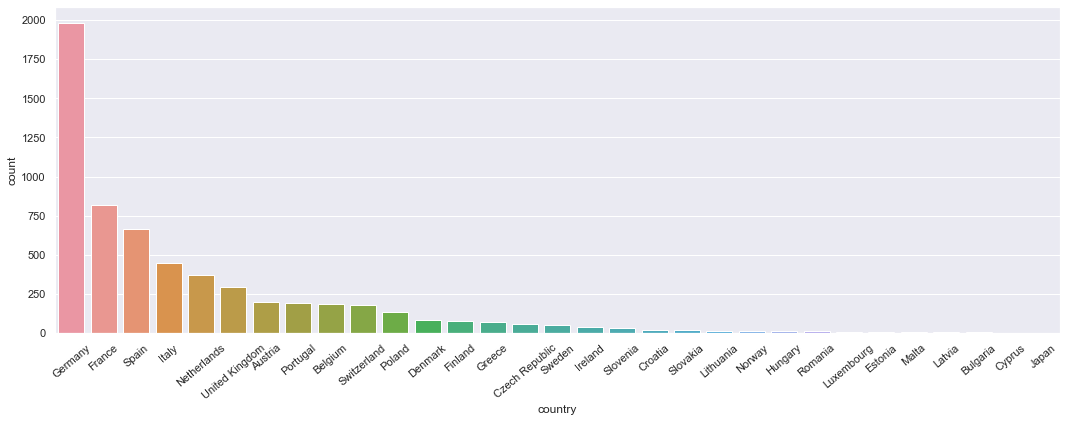

In [22]:
# Visualize the sellers nationality
plt.figure(figsize=(18, 6))
plt.tight_layout()
plt.xticks(rotation=40)
sns.countplot(data=seller, x='country', order=seller['country'].value_counts().index)

<AxesSubplot:xlabel='member_since', ylabel='count'>

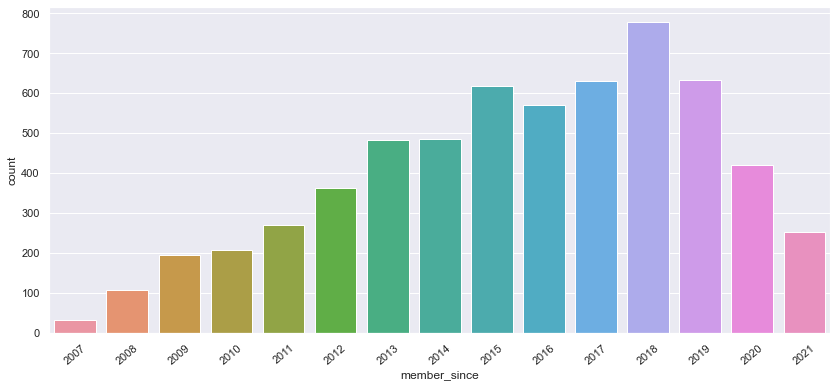

In [23]:
# Show the amounts of users registered in each year
plt.figure(figsize=(14, 6))
plt.tight_layout()
plt.xticks(rotation=40)
sns.countplot(data=seller, x='member_since')

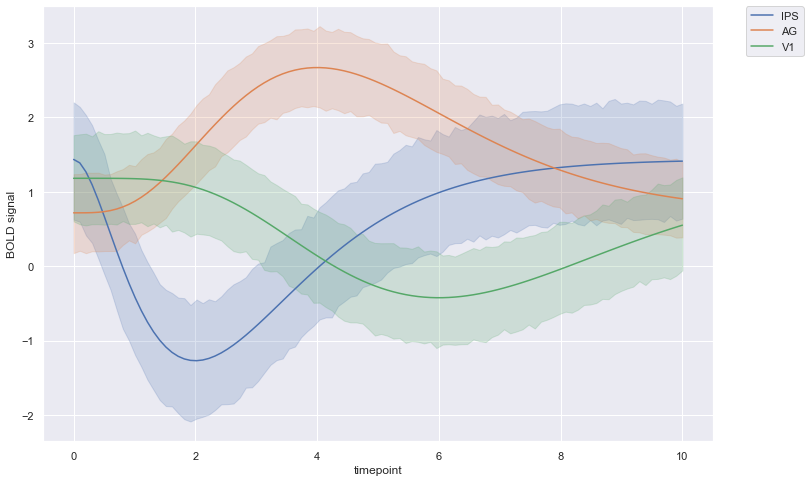

In [24]:
# Sample code for legend-placing reference (not relevant)
# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.lineplot(data=gammas, x="timepoint", y="BOLD signal", hue="ROI")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

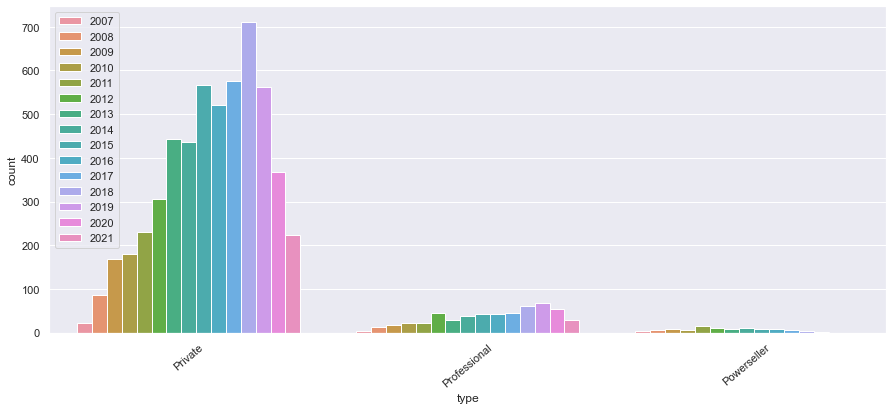

In [25]:
# Show new users per year, but split into user types
plt.figure(figsize=(15, 6))
plt.tight_layout()
plt.xticks(rotation=40)
sns.countplot(data=seller, x='type', hue='member_since')
plt.legend(loc='best')

In [26]:
# Load the date dataset
date = pd.read_csv('../data/date.csv', ';')
date

,date_ID,day,month,year,day_of_week
0,1,1,9,2021,3
1,2,2,9,2021,4
2,3,3,9,2021,5
3,4,4,9,2021,6
4,5,5,9,2021,7
5,6,6,9,2021,1
6,7,7,9,2021,2
7,8,8,9,2021,3
8,9,9,9,2021,4
9,10,10,9,2021,5


In [27]:
# Process the date into a proper datetime format
import datetime

In [28]:
# Replace date_ID with a real date and create a 3-way-joined detailed card stats table
card_info = card_stats.join(card, on='card_ID', rsuffix='_c').join(date, on='date_ID', rsuffix='_d').dropna()
for i in card_info.index:
    card_info.loc[i, 'date'] = datetime.date(int(card_info.loc[i, 'year']),
                                             int(card_info.loc[i, 'month']),
                                             int(card_info.loc[i, 'day']))

card_info = card_info[['card_ID', 'card_name', '30_avg_price', '7_avg_price', '1_avg_price', 'available_items', 'expansion_name', 'rarity', 'date']]
card_info

,card_ID,card_name,30_avg_price,7_avg_price,1_avg_price,available_items,expansion_name,rarity,date
0,1,Impulse,0.69,0.75,0.91,948,Battlebond,Common,2021-09-02
1,2,"Zndrsplt, Eye of Wisdom",0.19,0.24,0.23,2274,Battlebond,Rare,2021-09-02
2,3,Chain Lightning,0.41,0.44,0.41,1351,Battlebond,Uncommon,2021-09-02
3,4,Stolen Strategy,2.16,2.36,3.79,319,Battlebond,Rare,2021-09-02
4,5,Azra Oddsmaker,11.51,12.28,13.09,166,Battlebond,Uncommon,2021-09-02
...,...,...,...,...,...,...,...,...,...
2370,259,Rhox Brute,0.04,0.03,0.01,4813,Battlebond,Common,2021-09-10
2371,260,Hexplate Golem,0.02,0.04,0.02,4842,Battlebond,Common,2021-09-10
2372,261,Night Market Guard,0.03,0.03,0.02,4949,Battlebond,Common,2021-09-10
2373,262,Will Kenrith (V.2),0.02,0.03,0.02,4923,Battlebond,Mythic,2021-09-10


In [29]:
# Peek at the day-by-day changes in stats for each Rarity individually
card_prices = card_info.groupby(by=['rarity', 'date']).mean().drop('card_ID', axis=1)
card_prices

30_avg_price  7_avg_price  1_avg_price  available_items
rarity   date                                                               
Common   2021-09-02      0.157500     0.171300     0.167100      3809.420000
         2021-09-03      0.156300     0.166800     0.158800      3804.590000
         2021-09-04      0.156100     0.165100     0.153500      3800.140000
         2021-09-05      0.156700     0.164400     0.155000      3841.800000
         2021-09-06      0.156300     0.162400     0.121800      3849.040000
         2021-09-07      0.156400     0.162400     0.123300      3849.850000
         2021-09-08      0.156200     0.162300     0.125100      3866.930000
         2021-09-09      0.156400     0.162400     0.157500      3891.580000
         2021-09-10      0.156800     0.162100     0.143400      3930.360000
Land     2021-09-02      1.606000     1.606000     1.532000      1570.600000
         2021-09-03      1.606000     1.606000     1.532000      1570.600000
         2021-09-04      1.600000     1.666000     1.406000      1570.800000
         2021-09-05      1.602000     1.584000     1.482000      1573.200000
         2021-09-06      1.608000     1.598000     1.730000      1573.000000
         2021-09-07      1.608000     1.598000     1.730000      1575.000000
         2021-09-08      1.614000     1.640000     1.842000      1597.200000
         2021-09-09      1.624000     1.650000     1.676000      1615.200000
         2021-09-10      1.610000     1.622000     1.620000      1618.800000
Mythic   2021-09-02      6.268824     6.652941     6.498824      2311.117647
         2021-09-03      6.269412     6.655882     6.521765      2310.176471
         2021-09-04      6.262941     6.631765     6.519412      2319.764706
         2021-09-05      6.262941     6.632941     6.531176      2327.823529
         2021-09-06      6.261176     6.626471     6.500588      2331.529412
         2021-09-07      6.261176     6.626471     6.500588      2333.588235
         2021-09-08      6.285882     6.581176     6.474118      2357.529412
         2021-09-09      6.278824     6.590588     6.458235      2384.705882
         2021-09-10      6.280588     6.511176     6.477059      2373.058824
Rare     2021-09-02      4.029057     4.014717     4.005283      1132.867925
         2021-09-03      4.030377     4.013208     4.036792      1132.245283
         2021-09-04      4.043585     4.023962     4.098491      1133.283019
         2021-09-05      4.046792     4.046226     4.109057      1135.566038
         2021-09-06      4.046604     4.036038     4.085472      1136.886792
         2021-09-07      4.046604     4.036038     4.085472      1138.396226
         2021-09-08      4.049245     4.069245     4.028868      1145.452830
         2021-09-09      4.055849     4.042642     4.085283      1161.886792
         2021-09-10      4.055660     4.032642     4.050189      1161.509434
Token    2021-09-02      0.180000     0.190000     0.140000      2795.500000
         2021-09-03      0.180000     0.190000     0.140000      2794.625000
         2021-09-04      0.177500     0.180000     0.111250      2808.875000
         2021-09-05      0.176250     0.178750     0.175000      2833.250000
         2021-09-06      0.176250     0.178750     0.093750      2848.375000
         2021-09-07      0.176250     0.180000     0.093750      2850.500000
         2021-09-08      0.177500     0.182500     0.205000      2857.625000
         2021-09-09      0.176250     0.162500     0.161250      2865.625000
         2021-09-10      0.177500     0.160000     0.166250      2900.875000
Uncommon 2021-09-02      1.278375     1.254625     1.311875      3089.437500
         2021-09-03      1.278000     1.256000     1.309750      3087.487500
         2021-09-04      1.276750     1.253375     1.231375      3087.950000
         2021-09-05      1.280000     1.257625     1.419000      3113.225000
         2021-09-06      1.282875     1.260500     1.244000      3117.100000
         2021-09-

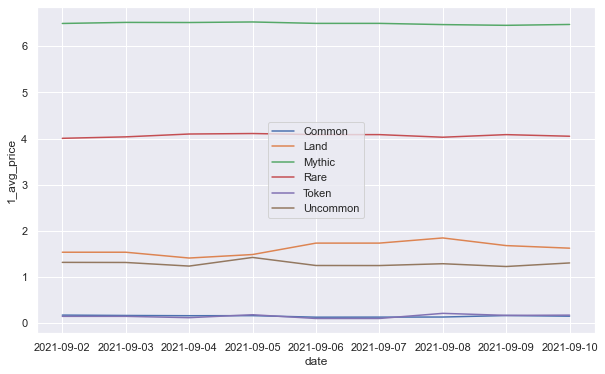

In [30]:
# Plot average card price for each Rarity vs time
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.lineplot(data=card_prices, x='date', y='1_avg_price', hue='rarity')
plt.legend(loc='center')

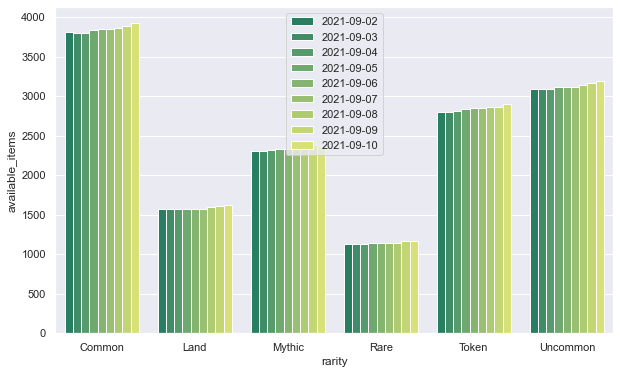

In [31]:
# Show card availability by by extensions
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.barplot(data=card_prices.reset_index(), x='rarity', y='available_items', hue='date', palette='summer')
plt.legend(loc='upper center')

In [32]:
# Read the dataset with sale offers info
sale_offer = pd.read_csv('../data/sale_offer.csv', ';')
sale_offer

,seller_ID,price,card_ID,card_condition,language,is_foiled,amount,date_ID
0,2,0.15,1,Mint,English,False,1,1
1,5,0.25,1,Excellent,S-Chinese,False,1,1
2,4849,0.30,1,Near Mint,English,False,1,1
3,1981,0.35,1,Near Mint,English,False,4,1
4,11,0.35,1,Near Mint,S-Chinese,False,3,1
...,...,...,...,...,...,...,...,...
1068439,4806,30.00,264,Near Mint,English,True,1,10
1068440,193,33.99,264,Near Mint,English,True,1,10
1068441,474,34.85,264,Near Mint,English,True,1,10
1068442,2557,34.90,264,Near Mint,English,True,4,10
